In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from skimage import io, filters
from skimage.color import rgb2gray

**1) Thresholding**

In [3]:
lily_im = io.imread('/home/apd/Projects/ImageAnalysis/HW2/robert-mapplethrope-calla-lily-1984.png')
istanbul_im = io.imread('/home/apd/Projects/ImageAnalysis/HW2/istanbul_arch_museum_gray_crop.png')

In [4]:
lily_threshold = filters.threshold_otsu(lily_im)
istanbul_threshold = filters.threshold_otsu(istanbul_im)

lily_thresholded = (lily_im > lily_threshold).astype(np.uint8)
istanbul_thresholded = (istanbul_im > istanbul_threshold).astype(np.uint8)

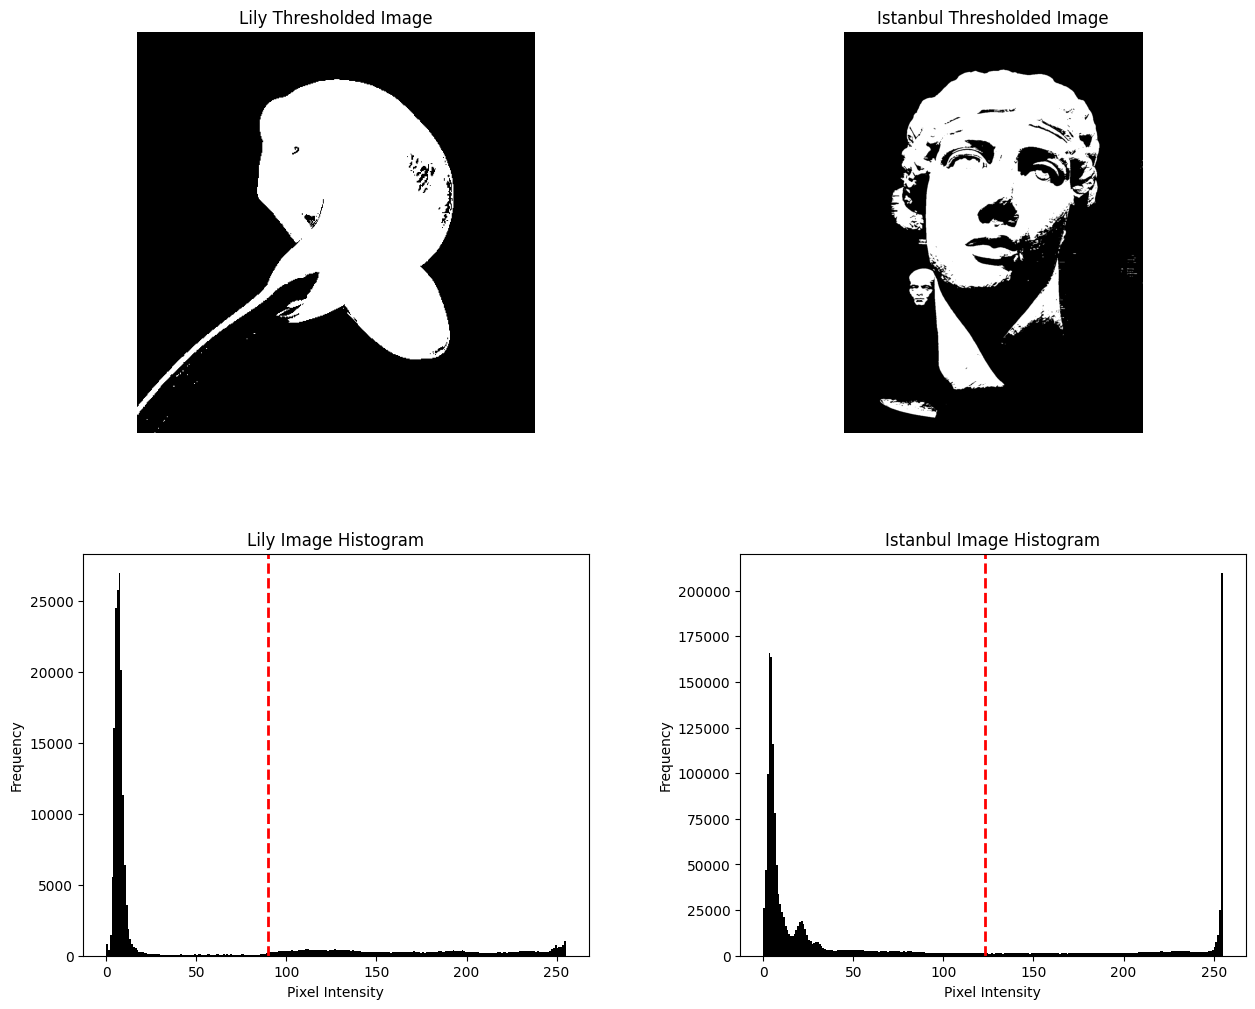

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Lily binary thresholded image
ax[0, 0].imshow(lily_thresholded, cmap='gray')
ax[0, 0].axis('off')
ax[0, 0].set_title('Lily Thresholded Image')

# Istanbul binary thresholded image
ax[0, 1].imshow(istanbul_thresholded, cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title('Istanbul Thresholded Image')

# Lily Histogram
ax[1, 0].hist(lily_im.ravel(), bins=256, color='black')
ax[1, 0].axvline(lily_threshold, color='red', linestyle='dashed', linewidth=2)
ax[1, 0].set_title('Lily Image Histogram')
ax[1, 0].set_xlabel('Pixel Intensity')
ax[1, 0].set_ylabel('Frequency')

# Istanbul Histogram
ax[1, 1].hist(istanbul_im.ravel(), bins=256, color='black')
ax[1, 1].axvline(istanbul_threshold, color='red', linestyle='dashed', linewidth=2)
ax[1, 1].set_title('Istanbul Image Histogram')
ax[1, 1].set_xlabel('Pixel Intensity')
ax[1, 1].set_ylabel('Frequency')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

For both images, It seems like it chose somewhere around the midpoint--which makes sense for minimizing intraclass variance/maximizing interclass variance. For the istanbul image this is even more clear since there are peaks at each end of the spectrum, so the threshold is almost exactly in the middle. For the Lily image it is a little more "left", or low, since the intensity is more spread out in the upper regions and there's no real peak towards the higher values.

Text(0, 0.5, 'Frequency')

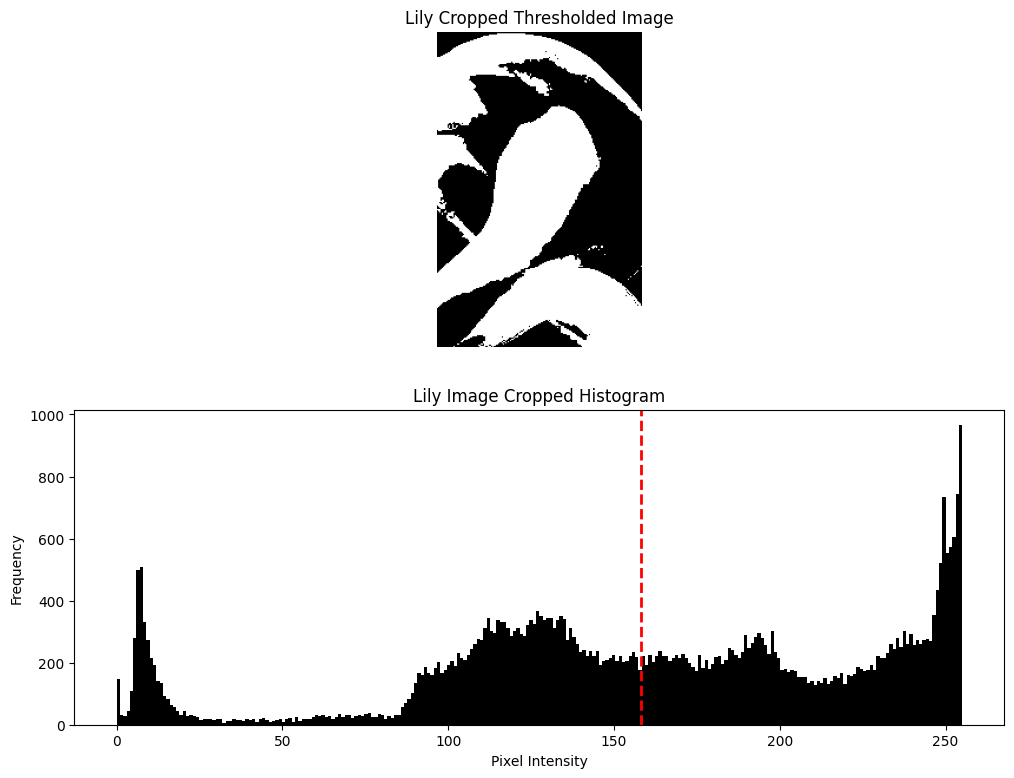

In [7]:
lily_CROP_im = io.imread('/home/apd/Projects/ImageAnalysis/HW2/robert-mapplethrope-calla-lily-1984_CROP.png')
lily_CROP_threshold = filters.threshold_otsu(lily_CROP_im)
lily_CROP_thresholded = (lily_CROP_im > lily_CROP_threshold).astype(np.uint8)

fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Lily binary thresholded image
ax[0].imshow(lily_CROP_thresholded, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Lily Cropped Thresholded Image')

# Lily Cropped Histogram
ax[1].hist(lily_CROP_im.ravel(), bins=256, color='black')
ax[1].axvline(lily_CROP_threshold, color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('Lily Image Cropped Histogram')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency')

This thresholded image of the cropped lily png looks different because the spread of the intensity values has changed due to the cropping. Before the crop, there was a lot of black, or low intensity valued pixels surrounding the Lily. The cropped version zooms in on the lily, so it's pixel values' are mostly concentrated to the "right", or with high intensity (white). We still see a small peak of black pixels, since it's not a perfect segmentation of the Lily. We see more features of the Lily (at least I think so) with the shadows in this cropped case, since Otsu's method is now being applied to a more concentrated view of the Lily, thus the separation of the two groups of pixel values seems to (qualitatively) boil down to what is shadows under the Lily (and a little bit of black background) vs. the lighter parts of the Lily.

**2) Thresholding, Again!**

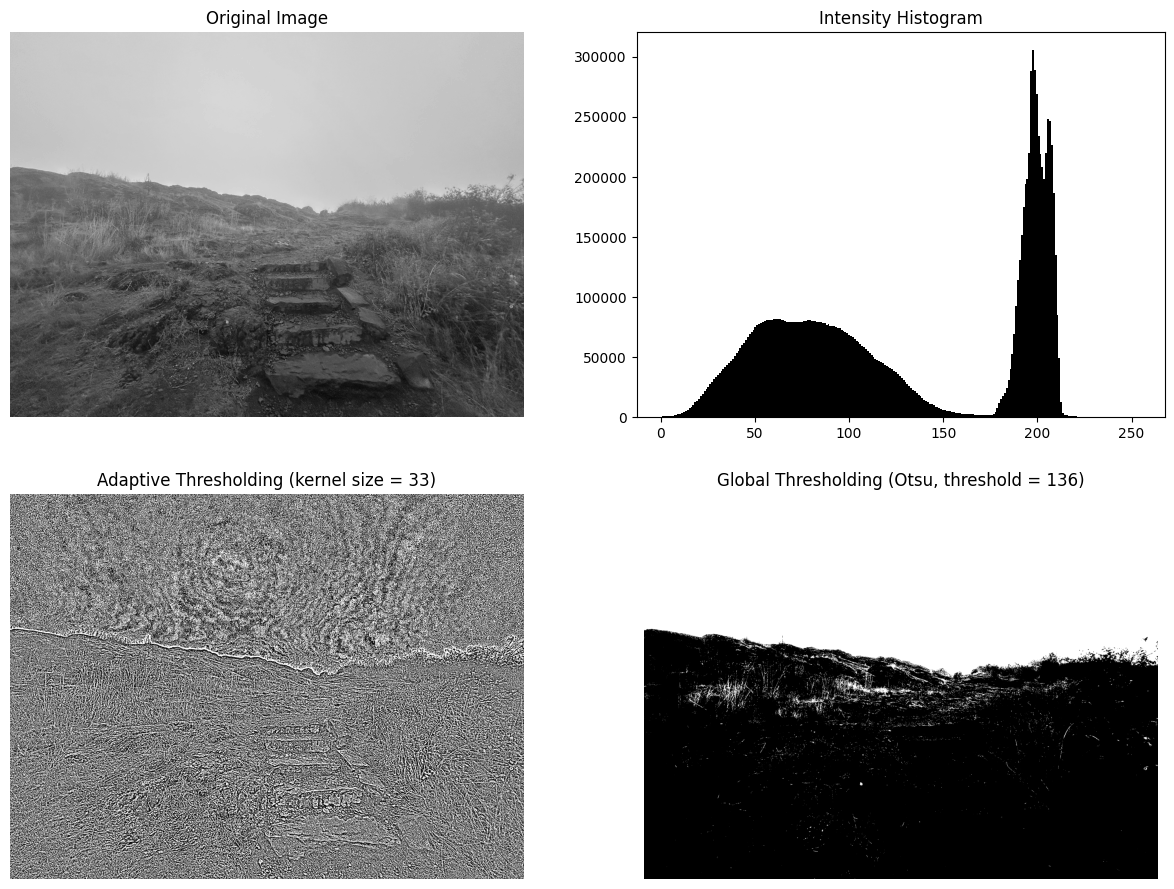

In [28]:
spencers_butte = (rgb2gray(io.imread('/home/apd/Projects/ImageAnalysis/HW2/IMG_2602.jpg'))*255).astype(np.uint8)
block_size = 33
method = 'gaussian'
offset = 0
adaptive_thresh = filters.threshold_local(spencers_butte, block_size, method, offset)
global_thresh = filters.threshold_otsu(spencers_butte)

spencers_butte_adaptive = (spencers_butte > adaptive_thresh).astype(np.uint8)
spencers_butte_global = (spencers_butte > global_thresh).astype(np.uint8)

plt.figure(figsize=(15, 11))
plt.subplot(2, 2, 1)
plt.imshow(spencers_butte, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(spencers_butte.ravel(), bins = 256, range = (0,255), color = 'black');
plt.title('Intensity Histogram')

plt.subplot(2, 2, 3)
plt.imshow(spencers_butte_adaptive, cmap = 'gray')
plt.title(f"Adaptive Thresholding (kernel size = {block_size})")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(spencers_butte_global, cmap = 'gray')
plt.title(f"Global Thresholding (Otsu, threshold = {global_thresh})")
plt.axis('off')

plt.tight_layout
plt.show()

**3) Protein Density**

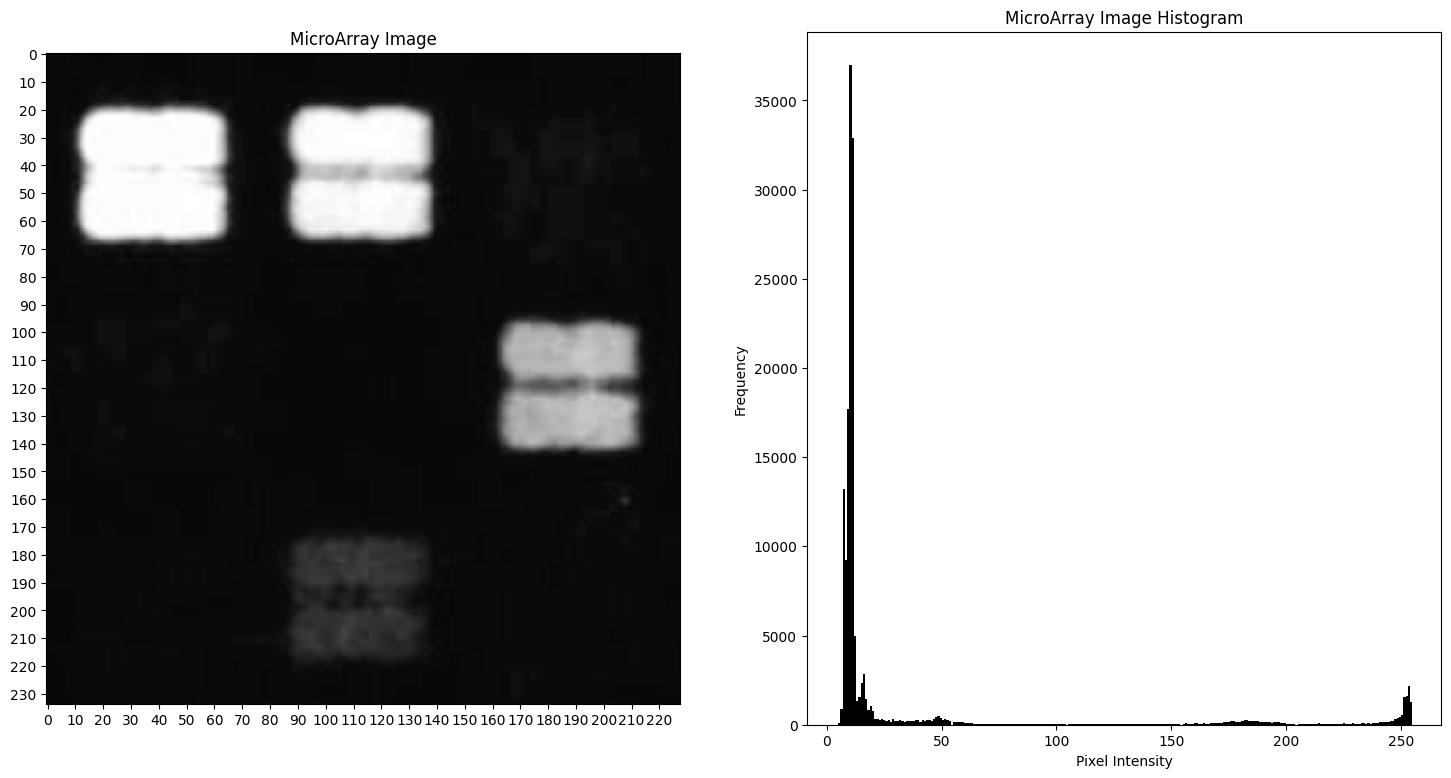

In [30]:
ma_im = io.imread('/home/apd/Projects/ImageAnalysis/HW2/microarray_crop.png')

fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ax[0].imshow(ma_im)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(10))
ax[0].set_title('MicroArray Image')

ax[1].hist(ma_im.ravel(), bins = 256, color = 'black');
ax[1].set_title('MicroArray Image Histogram')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Frequency'); 

I'm going to try doing an ROI analysis in python instead of ImageJ, I think it would be useful to know in upcoming assignments, (perhaps this part of the assignment could be done semi-automatically with edge detection and the below technique. Should it be done automatically? Who knows!)

In [37]:
def get_ROI_intensities(image, roi_list, roi_names=None, show_histograms=False):
    """
    Plots multiple ROIs on the image, calculates the average intensity in each selected region,
    and optionally generates histograms of the pixel values within each ROI.

    Parameters:
    - image: The input image as a 2D numpy array (grayscale).
    - roi_list: A list of tuples, where each tuple contains x_coords and y_coords for an ROI.
                Each ROI is defined as ((x_start, x_end), (y_start, y_end)).
    - roi_names: (Optional) A list of strings that specify names for each ROI.
                 If not provided, the ROIs will be labeled by index.
    - show_histograms: (Optional) Boolean flag to show histograms for each ROI. Default is False.

    Returns:
    - intensities: A list of average intensity values for each ROI.
    """
    # Initialize the list to store average intensities
    intensities = []
    
    if show_histograms:
        fig, ax = plt.subplots(1, 2, figsize=(15, 8))  
        ax_image, ax_histogram = ax
    else:
        fig, ax_image = plt.subplots(1, figsize=(10, 10)) 
    
    ax_image.imshow(image, cmap='gray')
    ax_image.axis('off')
    
    for idx, (x_coords, y_coords) in enumerate(roi_list):
        x_start, x_end = x_coords
        y_start, y_end = y_coords
        
        roi_bounding_box = image[y_start:y_end, x_start:x_end]
        ROI = roi_bounding_box.ravel()

        average_intensity = np.mean(roi_bounding_box)
        intensities.append(average_intensity)
        
        rect = Rectangle((x_start, y_start), x_end - x_start, y_end - y_start, edgecolor='red', facecolor='none', linewidth=2)
        ax_image.add_patch(rect)
        
        roi_label = roi_names[idx] if roi_names else f'ROI {idx+1}'
        
        ax_image.text(x_start, y_start - 5, roi_label, color='red', fontsize=12)
        
        if show_histograms:
            number_of_bins = (np.max(ROI) - np.min(ROI))
            ax_histogram.hist(ROI, bins=number_of_bins, alpha=0.4, label=roi_label)
    
    if show_histograms:
        ax_histogram.set_title('Pixel Value Histograms of ROIs')
        ax_histogram.set_xlabel('Pixel Intensity')
        ax_histogram.set_ylabel('Frequency')
        ax_histogram.legend(loc='best')
    
    plt.tight_layout()
    plt.show()
    
    return intensities

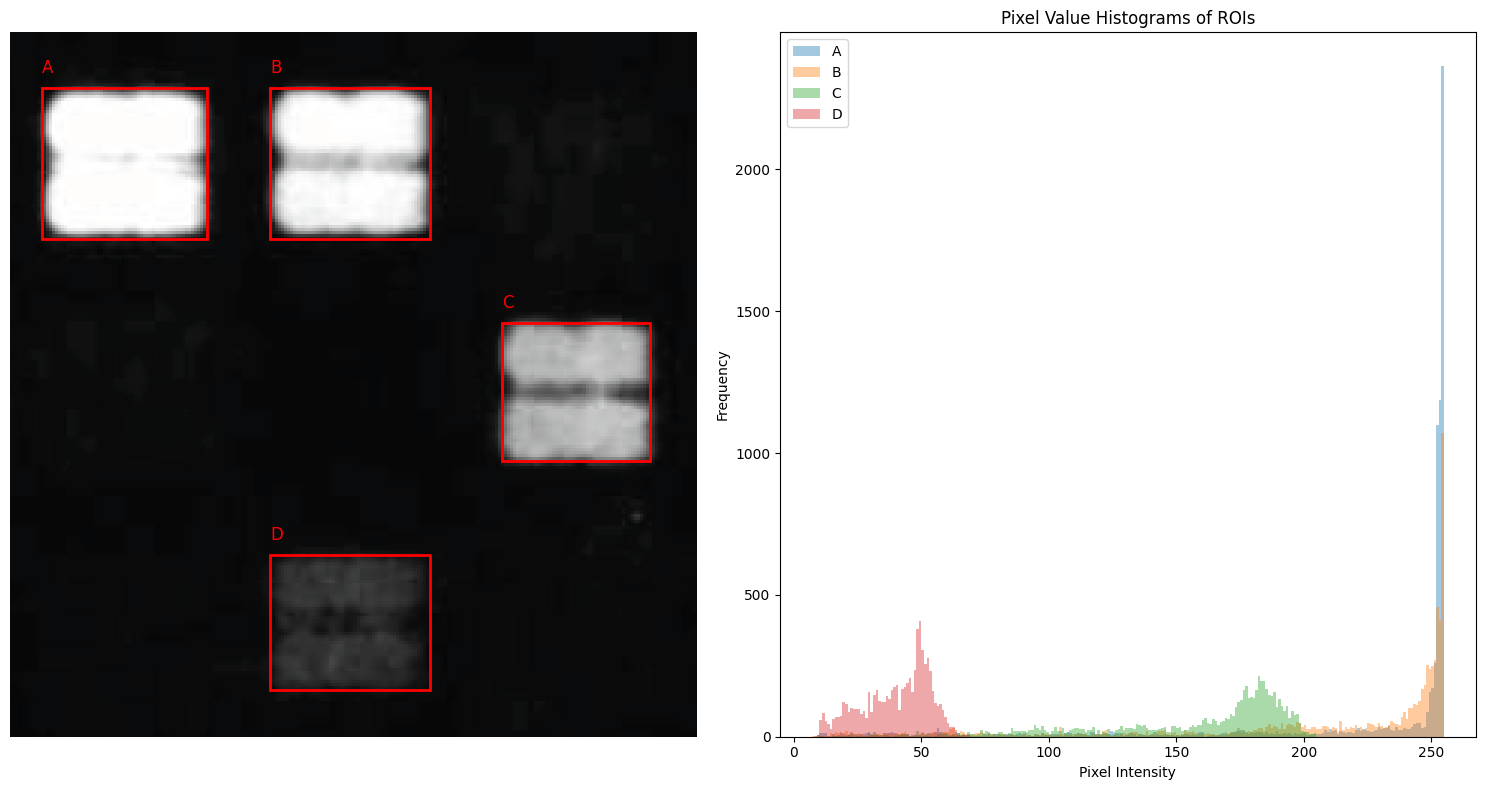

In [38]:
# make sure coords are (x_min --> x_max), (y_min --> y_max)
# weird tuples I know but it meshes well with code 

roi_list = [
    ((10, 65), (18, 68)),     # A
    ((86, 139), (18, 68)),    # B
    ((163, 212), (96, 142)),   # C
    ((86, 139), (173, 218)),   # D
]

[A_intensity, B_intensity, C_intensity, D_intensity] = get_ROI_intensities(ma_im, roi_list = roi_list, roi_names = ['A','B','C','D'], show_histograms=True);

In [36]:
print(C_intensity/D_intensity)

3.877427863785288


**a)**

If we are just taking the mean, (not accounting for uncertainty) of the intensity for each field, and knowing that the protein density and intensity are directly proportional, then the protein density in field C is ~4X that in field D. However, mean might not be the best measure. Looking at the histogram, maybe either refining the boxes or fitting a distribution would provide more measured results.

In [39]:
print(A_intensity/D_intensity)

5.466952112690395


**b)**
Going by mean again, the protein density in field A is ~5.5X that in field D.

**4) Non-Uniform Background Substitution**

**a)** surf plot of image

Unique values in what I think is alpha layer: 0


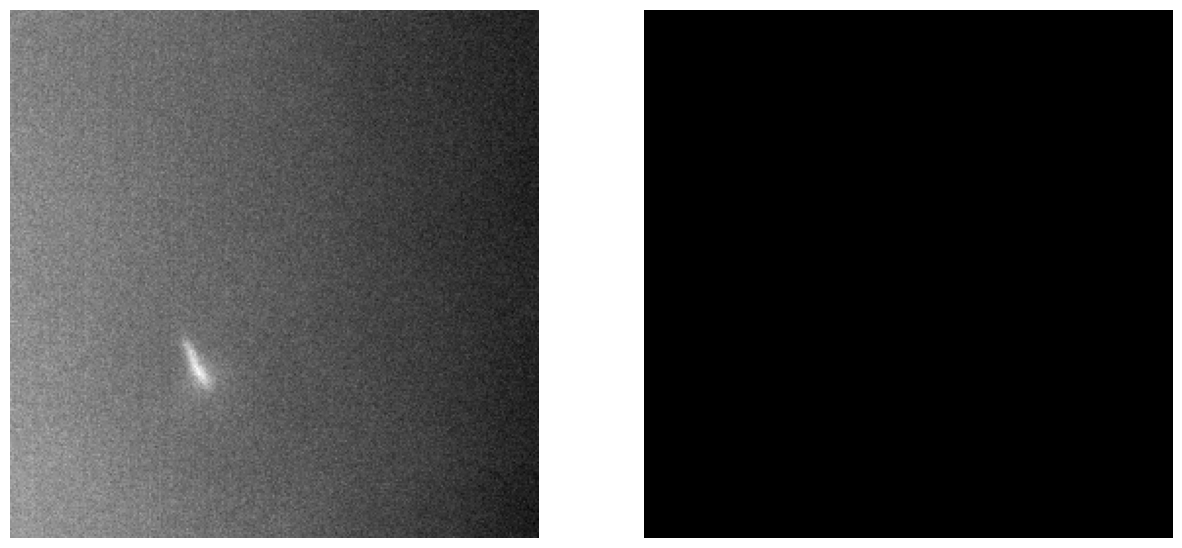

In [40]:
bead_im = io.imread('/home/apd/Projects/ImageAnalysis/HW2/GUV24_bead_crop.png')
image_layer = bead_im[:,:,0]
alpha_layer = bead_im[:,:,1]

plt.figure(figsize=(15, 9))
plt.subplot(1,2,1)
plt.imshow(image_layer,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(alpha_layer, cmap='gray');

unique_values = np.unique(offset)
print(f"Unique values in what I think is alpha layer: {unique_values[0]}")


It seems like there are two layers to this image, an intensity and an alpha value layer. Let's strip away the alpha value layer since they are all 255 (no useful information)

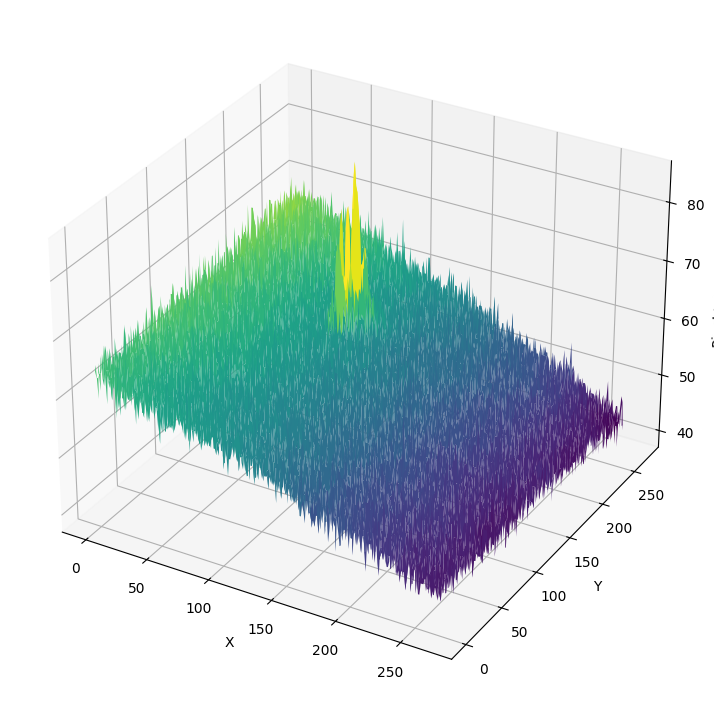

In [94]:
x = np.arange(image_layer.shape[1])
y = np.arange(image_layer.shape[0])
X , Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, image_layer, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pixel Intensity')
plt.show();

**b)** I vs. x and I vs. y

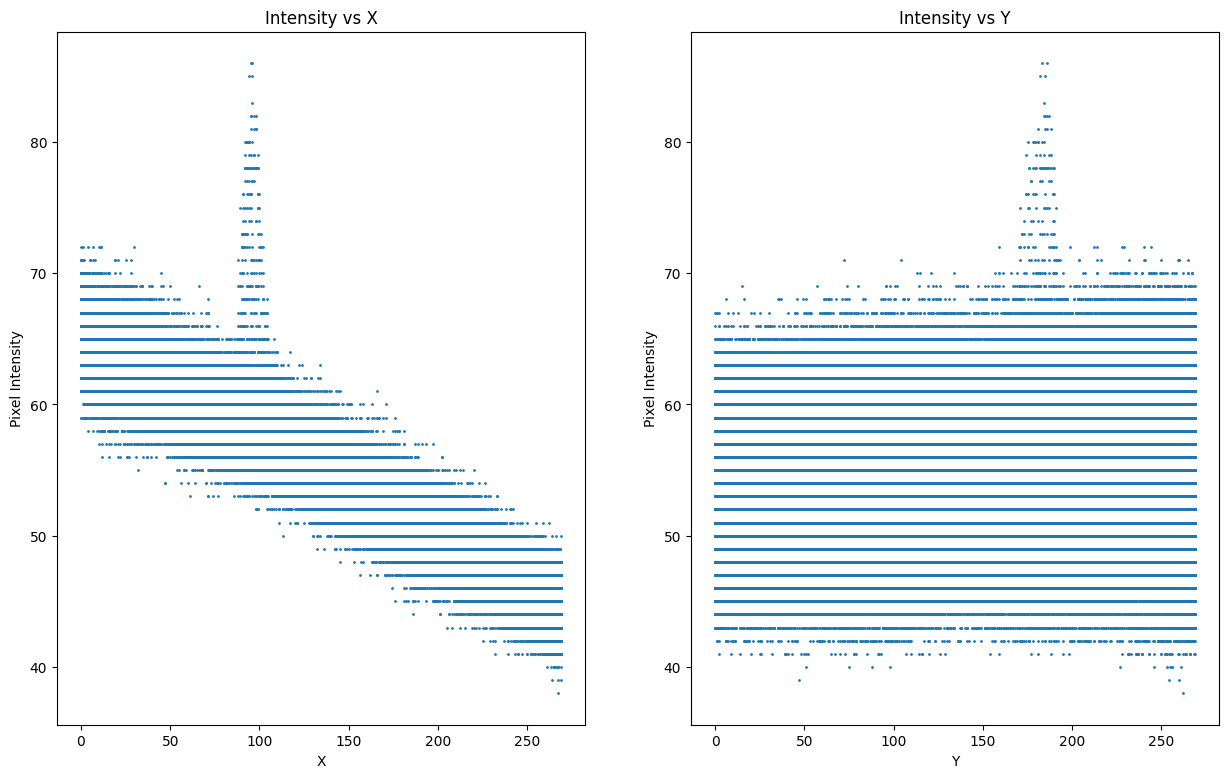

In [98]:
flattened_x = X.ravel()
flattened_y = Y.ravel()
flattened_I = image_layer.ravel()


plt.figure(figsize=(15, 9))
plt.subplot(1,2,1)
plt.scatter(flattened_x, flattened_I, s=1)
plt.title('Intensity vs X')
plt.xlabel('X')
plt.ylabel('Pixel Intensity')
plt.subplot(1,2,2)
plt.scatter(flattened_y, flattened_I, s=1)
plt.title('Intensity vs Y')
plt.xlabel('Y')
plt.ylabel('Pixel Intensity');

plt.tight_layout
plt.show();


**c)** fitting quadratic polynomial to background and subtracting out

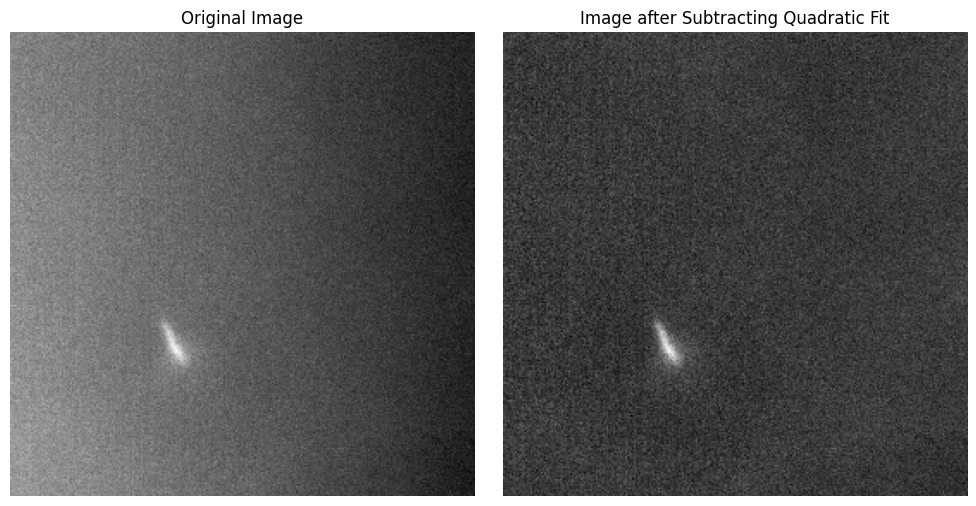

In [89]:
# Matrix A for quadratic fit
A = np.column_stack([
    flattened_x**2,        # p5 * x^2
    flattened_x * flattened_y,  # p4 * xy
    flattened_y**2,        # p3 * y^2
    flattened_x,           # p2 * x
    flattened_y,           # p1 * y
    np.ones_like(flattened_x)  # p0 * constant term
])

coefficients = np.linalg.lstsq(A, flattened_I, rcond=None)[0]

fitted_surface = (coefficients[0] * X**2 +
                  coefficients[1] * X * Y +
                  coefficients[2] * Y**2 +
                  coefficients[3] * X +
                  coefficients[4] * Y +
                  coefficients[5])

resulting_image = image_layer - fitted_surface

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_layer, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resulting_image, cmap='gray')
plt.title('Image after Subtracting Quadratic Fit')
plt.axis('off')

plt.tight_layout()
plt.show()

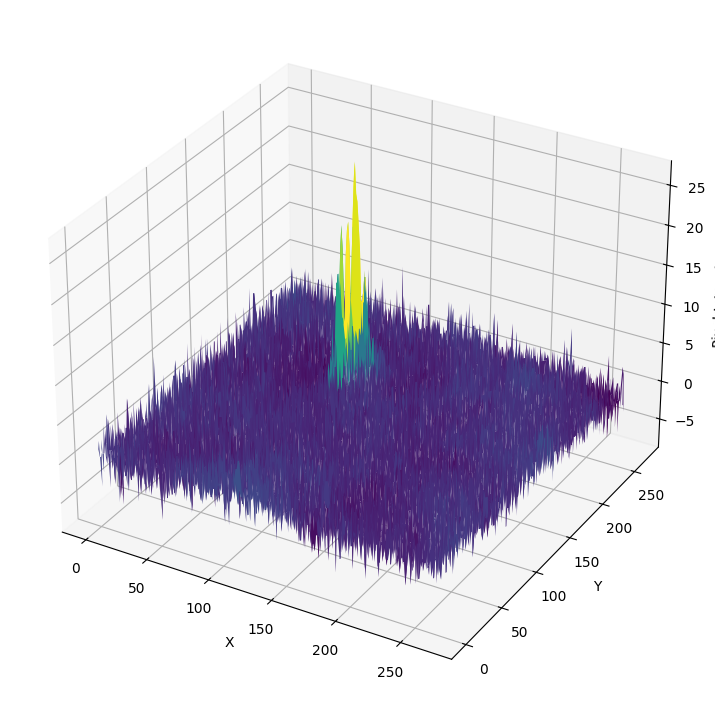

In [90]:
x = np.arange(image_layer.shape[1])
y = np.arange(image_layer.shape[0])
X , Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, resulting_image, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pixel Intensity')
plt.show();

**d)** In this case, this method worked well because the background is smooth and the foreground is very distinct from the background. Since we are only dealing with one peak, it's easy for the fit to "find" the background noise. However, if there were more peaks or the background was more oscillatory then a smooth gradient, then this method would have trouble separating the two and would likely subtract some of the foreground (signal) as well. When fitting for the background noise it has to be a case by case analysis (in my mind), where the type of function you are fitting to the background changes depending on your image. Some may require higher order polynomials or even oscillatory functions to properly match the background. If there are intense local variations in background then these may have to be handled on a piecewise basis as well.

**5) Comments**


This assignment took me a total of ~3 hours, with the ROI intensity analysis taking me the longest. If I'd done it in Fiji I'm sure it would've taken a shorter amount of time, but where's the fun in that. Using a standard library for the least squares regression saved me a lot of time too, if I had to build that from scratch it would've certainly took me longer. 